In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('../../Datasets/Google_Stock/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('../../Datasets/Google_Stock/Google_Stock_Price_Test.csv')

In [3]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [6]:
df_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [7]:
df_train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [8]:
df_train['Volume'][0]

'7,380,500'

In [9]:
V = []
for i in df_train['Volume']:
    c = i.split(',')
    x = "".join(c)  
    V.append(int(x))


In [10]:
df_train['Volume'] = V

In [11]:
df_train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume      int64
dtype: object

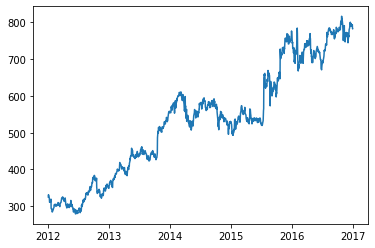

In [12]:
plt.plot(pd.to_datetime(df_train['Date']), df_train['Open'])

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_train[['Open','High','Low','Volume']])

In [14]:
X_scaled.shape

(1258, 4)

In [15]:
X_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

In [16]:
X_scaled[60,:4]

array([0.08627874, 0.08564439, 0.08283452, 0.15438526])

In [17]:
X_train = []
y_train = []
for i in range(1198):
    row = X_scaled[i:i+60,:4]
    y = X_scaled[i+60,:4]
    X_train.append(row)
    y_train.append(y)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [18]:
X_train.shape

(1198, 60, 4)

In [19]:
y_train.shape

(1198, 4)

In [20]:
X_train = X_train.reshape(1198,60,4)

In [1]:
# Model Building
from tensorflow.keras.layers import Dense, LSTM,
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(80, return_sequences = True, input_shape = (60,4)))
model.add(LSTM(80, return_sequences = True))
model.add(LSTM(80, return_sequences = True))
model.add(LSTM(80, return_sequences = False))
model.add(Dense(4))

model.compile(loss='mean_squared_error')

In [23]:
hist = model.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
38/38 [==============================] - 7s 71ms/step - loss: 0.0342
Epoch 2/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0129
Epoch 3/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0090
Epoch 4/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0082
Epoch 5/50
38/38 [==============================] - 3s 67ms/step - loss: 0.0062
Epoch 6/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0058
Epoch 7/50
38/38 [==============================] - 2s 66ms/step - loss: 0.0062
Epoch 8/50
38/38 [==============================] - 3s 67ms/step - loss: 0.0051
Epoch 9/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0046
Epoch 10/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0046
Epoch 11/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0041
Epoch 12/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0037
Epoch 13/50
38/38 [==================

In [24]:
V2 = []
for i in df_test['Volume']:
    c = i.split(',')
    x = "".join(c)  
    V2.append(int(x))


In [25]:
df_test['Volume'] = V2

In [26]:
df_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [27]:
X_test_scaled = scaler.transform(df_test[['Open','High','Low','Volume']])

In [28]:
temp = np.vstack([X_scaled[-60:], X_test_scaled])

In [29]:
temp.shape

(80, 4)

In [30]:
X_test = []
for i in range(20):
    row = temp[i:i+60,:]
    X_test.append(row)
X_test = np.array(X_test)

In [31]:
X_test.shape

(20, 60, 4)

In [32]:
#X_test = X_test.reshape(20,60,4)

In [33]:
yp = model.predict(X_test)

In [34]:
yp

array([[0.96169937, 0.9683095 , 0.98143095, 0.02113745],
       [0.9646811 , 0.97242635, 0.9852746 , 0.02191338],
       [0.9696284 , 0.9779527 , 0.9920132 , 0.01904427],
       [0.96673054, 0.9743998 , 0.98825353, 0.01947688],
       [0.9795039 , 0.9873387 , 1.0010875 , 0.02118609],
       [0.98534137, 0.9929801 , 1.0084267 , 0.01889351],
       [0.9834545 , 0.9903344 , 1.0065653 , 0.0174158 ],
       [0.98212177, 0.988723  , 1.0053352 , 0.0162711 ],
       [0.9835371 , 0.9899955 , 1.0063086 , 0.01721913],
       [0.9905582 , 0.9974023 , 1.0145646 , 0.01588936],
       [0.9803216 , 0.98638415, 1.0034021 , 0.01609956],
       [0.98322195, 0.98985463, 1.006665  , 0.01597963],
       [0.9836388 , 0.99052256, 1.0080754 , 0.0140354 ],
       [0.9819538 , 0.988417  , 1.0049126 , 0.01661156],
       [0.9870724 , 0.99395907, 1.0099139 , 0.01869426],
       [0.9996421 , 1.0072875 , 1.0246055 , 0.01665935],
       [1.0037344 , 1.0108211 , 1.0290198 , 0.01562772],
       [1.0043335 , 1.0105113 ,

In [35]:
yp = scaler.inverse_transform(yp)

In [36]:
yp[:,3]

array([535702.1 , 555077.  , 483435.4 , 494237.78, 536916.6 , 479671.03,
       442772.5 , 414189.44, 437861.6 , 404657.34, 409906.03, 406911.44,
       358363.84, 422690.78, 474695.56, 423884.03, 398124.06, 534933.2 ,
       559369.5 , 621466.8 ], dtype=float32)

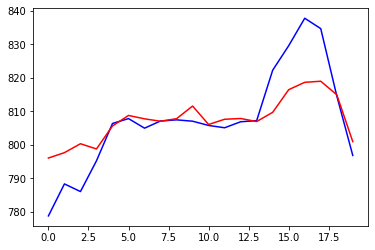

In [41]:
plt.plot(df_test['Open'], c='blue')
plt.plot(yp[:,0], c='red')

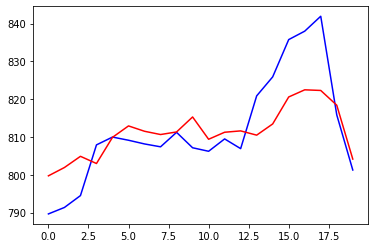

In [38]:
plt.plot(df_test['High'], c='blue')
plt.plot(yp[:,1], c='red')

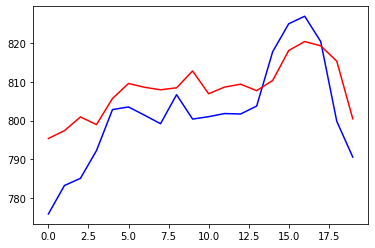

In [39]:
plt.plot(df_test['Low'], c='blue')
plt.plot(yp[:,2], c='red')

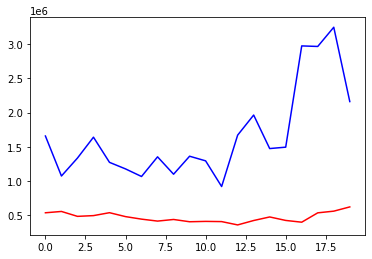

In [40]:
plt.plot(df_test['Volume'], c='blue')
plt.plot(yp[:,3], c='red')